# EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data
df = pd.read_csv('X_train.csv')

# Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Create Proxy for Academic Performance (Average of available scores)
score_cols = [c for c in df.columns if 'average_score' in c]
df['Avg_Performance'] = df[score_cols].mean(axis=1)

# Clean Data for Analysis
# We drop rows only where essential data for specific plots is missing later
print("Data Loaded Successfully.")

Data Loaded Successfully.


##  Family Environment

Question: Does the home environment (Mother's Education) predict student grit?

We analyze ST005 (Mother's Education Level) against Effort.

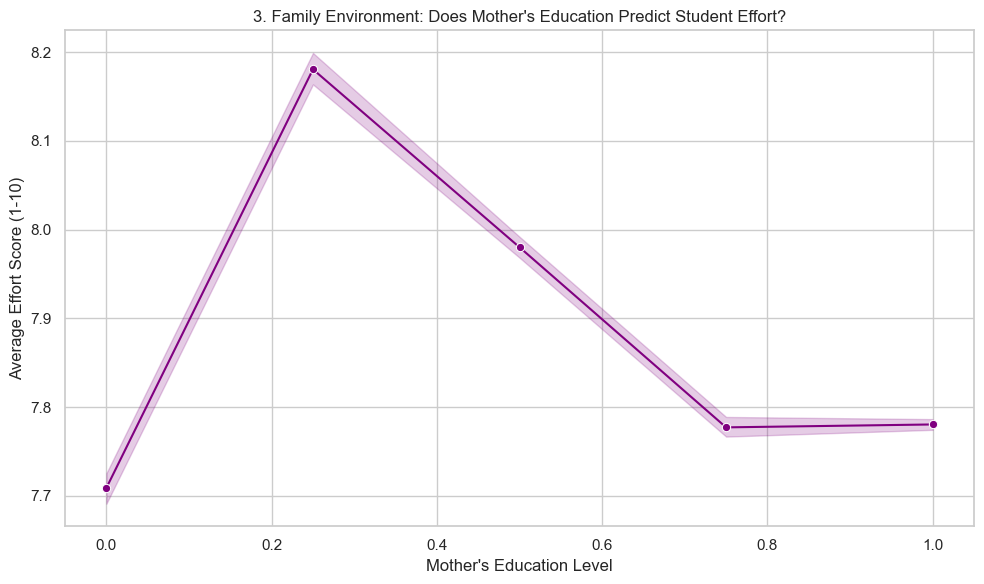

In [9]:
# Filter Data
df_fam = df.dropna(subset=['ST005', 'EFFORT1'])

plt.figure(figsize=(10, 6))
# Line plot to show the trend
sns.lineplot(x='ST005', y='EFFORT1', data=df_fam, color='purple', marker='o')

plt.title('3. Family Environment: Does Mother\'s Education Predict Student Effort?')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('Average Effort Score (1-10)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Personal Difficulties (Fear)

Question: Do students who feel scared shut down academically?

We analyze WB166 (Frequency of Feeling Scared).

/var/folders/hv/w6077z5935x8kmy_dbmjv7rw0000gn/T/ipykernel_7690/1264599461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WB166', y='EFFORT1', data=df_pers, palette='Reds')


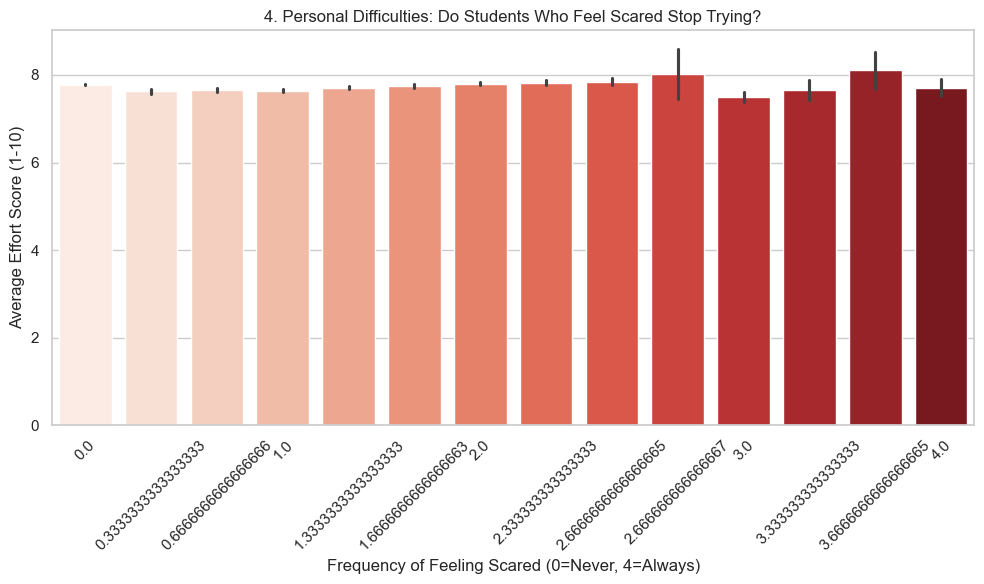

In [12]:
# Filter Data
df_pers = df.dropna(subset=['WB166', 'EFFORT1'])

plt.figure(figsize=(10, 6))
# Do students who feel scared often give up?
sns.barplot(x='WB166', y='EFFORT1', data=df_pers, palette='Reds')

plt.title('4. Personal Difficulties: Do Students Who Feel Scared Stop Trying?')
plt.xlabel('Frequency of Feeling Scared (0=Never, 4=Always)')
plt.ylabel('Average Effort Score (1-10)')
# Rotate labels to prevent overlap
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## The Consequence: ROI on Effort

Question: Does all this effort actually translate to better grades?

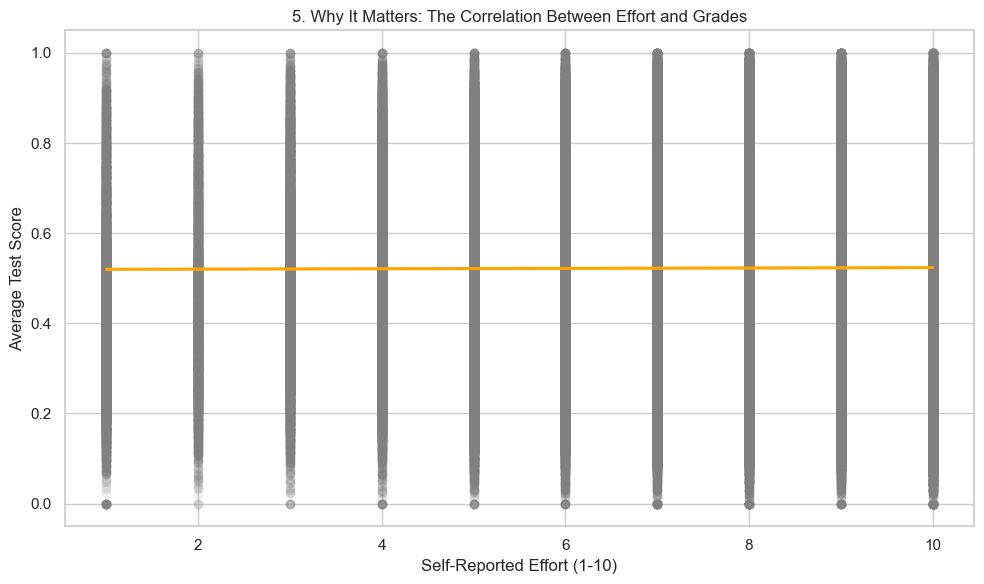

In [14]:
plt.figure(figsize=(10, 6))
# Scatter plot with regression line
sns.regplot(x='EFFORT1', y='Avg_Performance', data=df, 
            scatter_kws={'alpha':0.1, 'color':'gray'}, line_kws={'color':'orange'})

plt.title('5. Why It Matters: The Correlation Between Effort and Grades')
plt.xlabel('Self-Reported Effort (1-10)')
plt.ylabel('Average Test Score')
plt.tight_layout()
plt.show()


In [15]:
# --- 1. SETUP & DATA CLEANING ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Performance Proxy
score_cols = [c for c in df.columns if 'average_score' in c]
df['Avg_Performance'] = df[score_cols].mean(axis=1)

# Grade & Gender Mapping
grade_map = {0: 'On Track', -1: '1 Year Behind', -2: '2+ Years Behind', 1: 'Ahead'}
df['Grade_Status'] = df['GRADE'].map(grade_map).fillna('Other')

# --- PREPARE TEACHER VARIABLES ---
# ST212: Teacher Feedback (Usually 1=Never, 4=Every Lesson)
# ST213: Teacher Support (Usually 1=Every Lesson, 4=Never - PISA SCALES VARY, CHECK DATA!)
# We will treat them as categorical for safety.

# ST034: Sense of Belonging (1=Strongly Agree, 4=Strongly Disagree typically)
# We might need to invert these for plotting, but let's look at raw categories first.

## The Support Baseline

Question: How often are teachers actually providing extra help?

We analyze ST213 (Teacher Support). Note: Check your glossary for the specific scale (e.g., 1=Every Lesson, 4=Never).

/var/folders/hv/w6077z5935x8kmy_dbmjv7rw0000gn/T/ipykernel_7690/4272695207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ST213', data=df, palette='viridis')


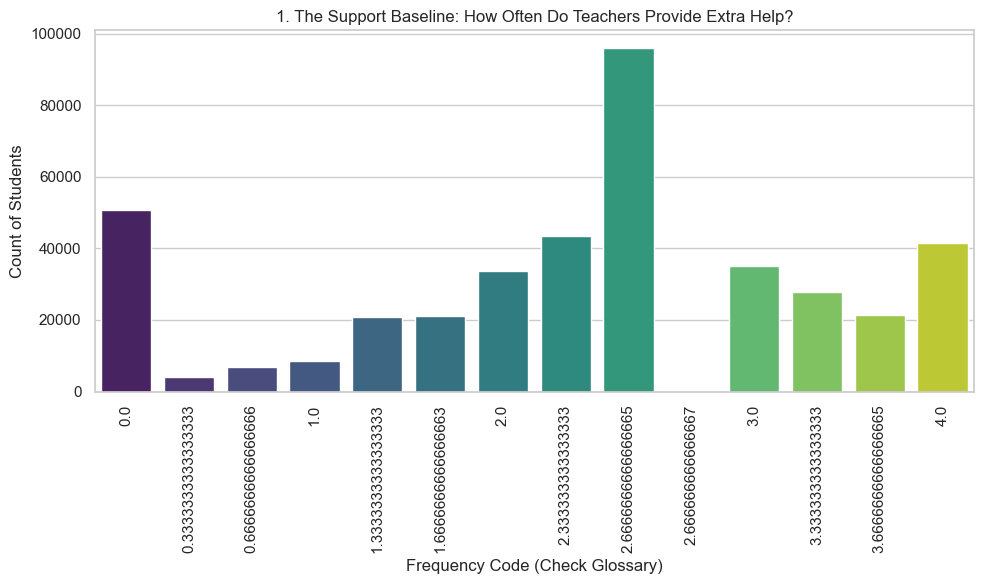

In [17]:
plt.figure(figsize=(10, 6))
# ST213 is often "Teacher gives extra help when needed"
sns.countplot(x='ST213', data=df, palette='viridis')

plt.title('1. The Support Baseline: How Often Do Teachers Provide Extra Help?')
plt.xlabel('Frequency Code (Check Glossary)')
plt.xticks(rotation=90)
plt.ylabel('Count of Students')
plt.tight_layout()
plt.show()


## The Feedback Loop

Question: Does frequent teacher feedback actually drive grades?

We analyze ST212 (Feedback Frequency) vs Avg_Performance.



/var/folders/hv/w6077z5935x8kmy_dbmjv7rw0000gn/T/ipykernel_7690/4274042893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST104', y='Avg_Performance', data=df_feed, palette='Blues_d')


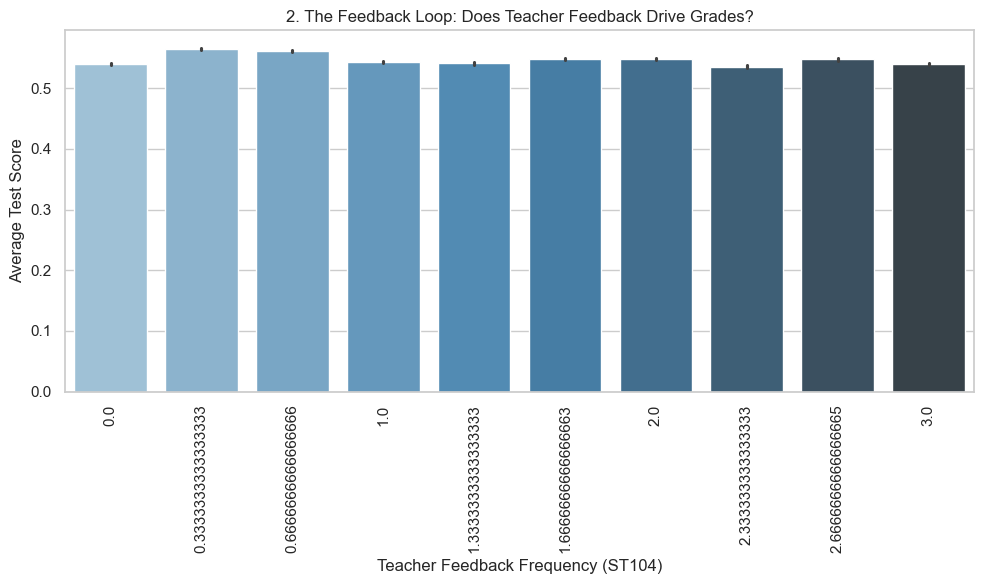

In [21]:
df_feed = df.dropna(subset=['ST104', 'Avg_Performance'])

plt.figure(figsize=(10, 6))
# Does frequent feedback improve scores?
sns.barplot(x='ST104', y='Avg_Performance', data=df_feed, palette='Blues_d')

plt.title('2. The Feedback Loop: Does Teacher Feedback Drive Grades?')
plt.xlabel('Teacher Feedback Frequency (ST104)')
plt.ylabel('Average Test Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##  The Belonging Gap

Question: Do students who feel "connected" to school perform better?

We analyze ST034 (Sense of Belonging) vs Avg_Performance.

/var/folders/hv/w6077z5935x8kmy_dbmjv7rw0000gn/T/ipykernel_7690/2202254761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST034', y='Avg_Performance', data=df_bel, palette='magma')


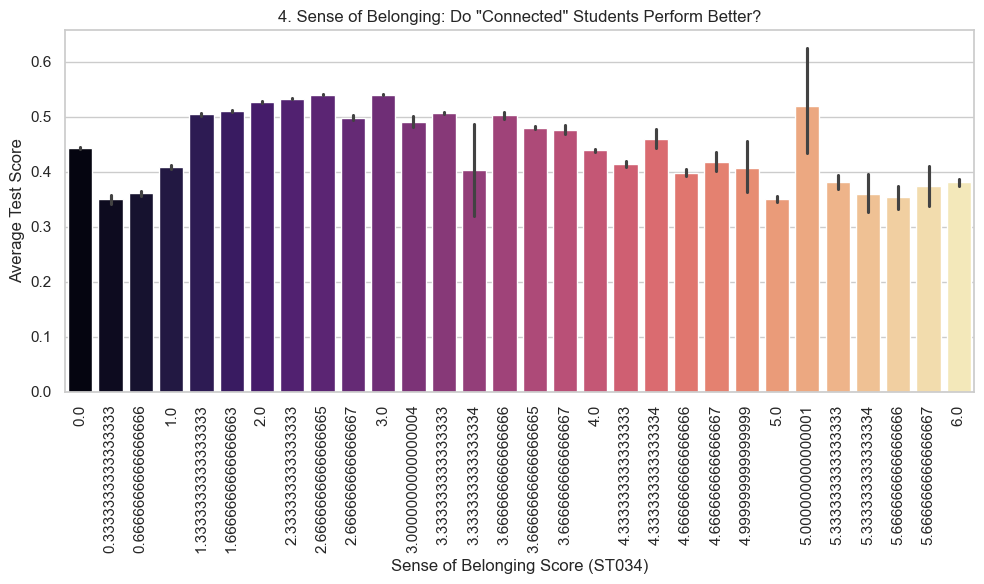

In [27]:
df_bel = df.dropna(subset=['ST034', 'Avg_Performance'])

plt.figure(figsize=(10, 6))
# ST034 = Sense of Belonging
sns.barplot(x='ST034', y='Avg_Performance', data=df_bel, palette='magma')

plt.title('4. Sense of Belonging: Do "Connected" Students Perform Better?')
plt.xlabel('Sense of Belonging Score (ST034)')
plt.ylabel('Average Test Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## The Equity Gap (Crucial)

Question: Do the students who are falling behind get the help they need?

We look at Grade_Status vs ST213 (Help Frequency).

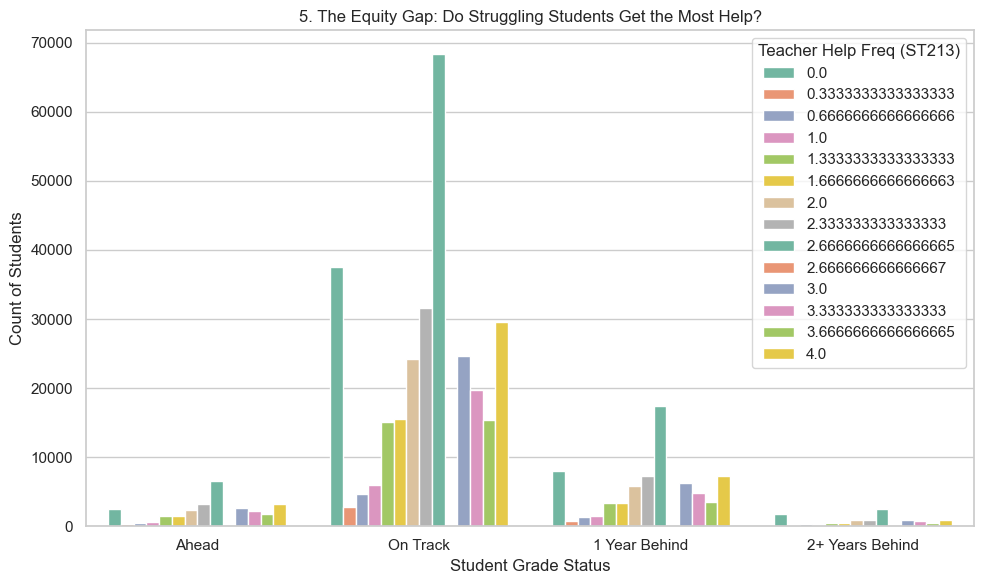

In [28]:
df_eq = df.dropna(subset=['Grade_Status', 'ST213'])
# Filter out "Other" for clarity
df_eq = df_eq[df_eq['Grade_Status'] != 'Other']
order = ['Ahead', 'On Track', '1 Year Behind', '2+ Years Behind']

plt.figure(figsize=(10, 6))
# Do the students who are "Behind" get MORE help?
sns.countplot(x='Grade_Status', hue='ST213', data=df_eq, order=order, palette='Set2')

plt.title('5. The Equity Gap: Do Struggling Students Get the Most Help?')
plt.xlabel('Student Grade Status')
plt.ylabel('Count of Students')
plt.legend(title='Teacher Help Freq (ST213)')
plt.tight_layout()
plt.show()


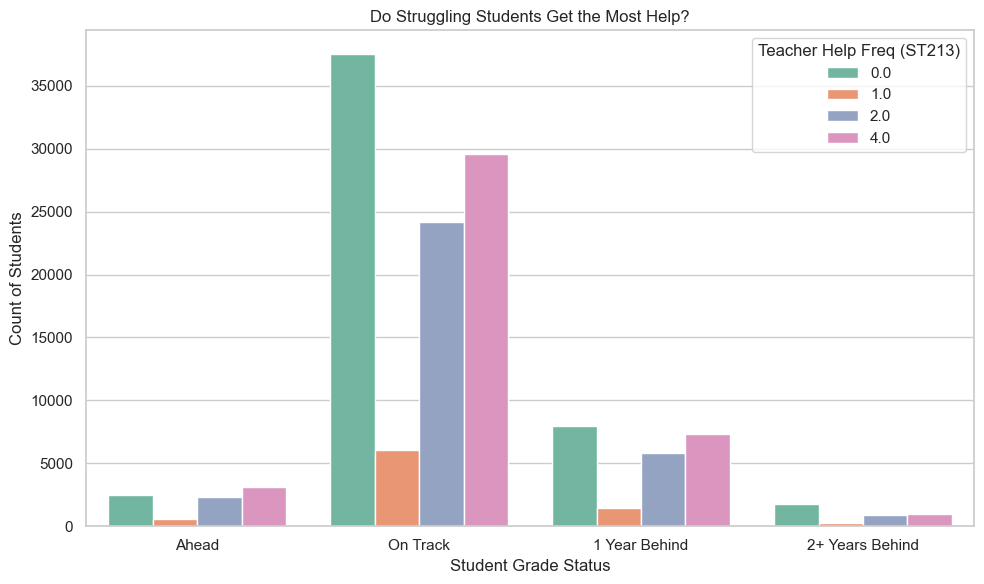

In [42]:
# Filter data for Grade Status and Teacher Support
df_eq = df.dropna(subset=['Grade_Status', 'ST213'])

# 1. Filter out "Other" grades
df_eq = df_eq[df_eq['Grade_Status'] != 'Other']

# 2. NEW: Filter Teacher Help Frequency to only 0, 1, 2, 4
target_values = [0, 1, 2, 4]
df_eq = df_eq[df_eq['ST213'].isin(target_values)]

order = ['Ahead', 'On Track', '1 Year Behind', '2+ Years Behind']

plt.figure(figsize=(10, 6))
# Do the students who are "Behind" get MORE help?
sns.countplot(x='Grade_Status', hue='ST213', data=df_eq, order=order, palette='Set2')

plt.title('Do Struggling Students Get the Most Help?')
plt.xlabel('Student Grade Status')
plt.ylabel('Count of Students')
plt.legend(title='Teacher Help Freq (ST213)')
plt.tight_layout()
plt.show()

In [29]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Performance Proxy
score_cols = [c for c in df.columns if 'average_score' in c]
df['Avg_Performance'] = df[score_cols].mean(axis=1)

# Map Gender
df['Gender'] = df['ST004D01T'].map({1: 'Female', 2: 'Male'})

# Clean Data for Analysis
df_dig = df.dropna(subset=['IC001', 'IC014', 'IC170', 'Avg_Performance', 'ST005'])

print("Data Loaded & Variables Prepared.")

Data Loaded & Variables Prepared.


## The Usage Gap (Behavior)

Question: Are students using tech to learn (School) or to play (Leisure)?

We compare IC014 (School Use) vs IC170 (Leisure Use).

Plot 2 Rows: 411320


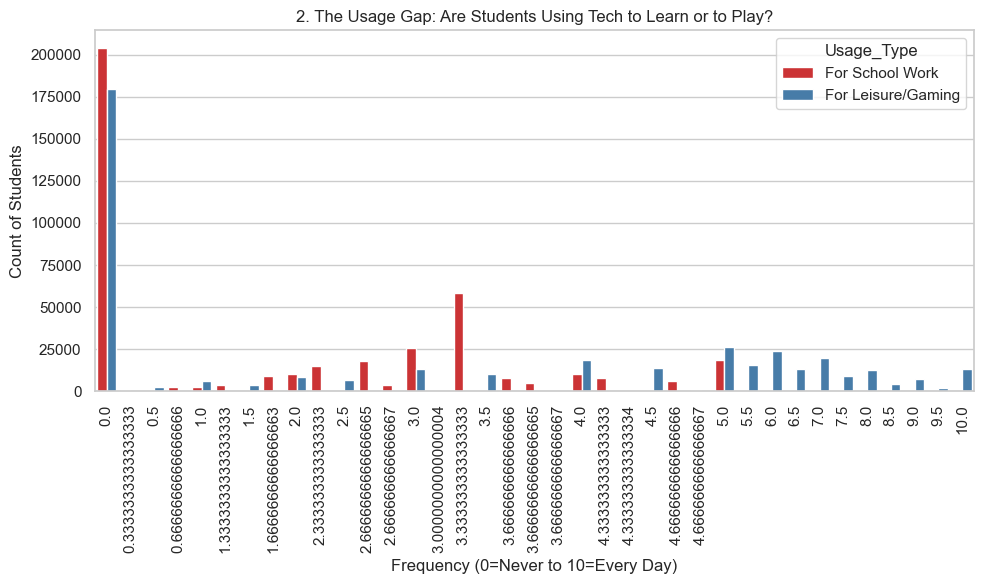

In [40]:
plot_df = df.dropna(subset=['IC014', 'IC170']).copy()
print(f"Plot 2 Rows: {len(plot_df)}")

# Melt data for side-by-side comparison
usage_df = plot_df[['IC014', 'IC170']].melt(var_name='Usage_Type', value_name='Frequency')
usage_df['Usage_Type'] = usage_df['Usage_Type'].map({'IC014': 'For School Work', 'IC170': 'For Leisure/Gaming'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency', hue='Usage_Type', data=usage_df, palette='Set1')

plt.title('2. The Usage Gap: Are Students Using Tech to Learn or to Play?')
plt.xlabel('Frequency (0=Never to 10=Every Day)')
plt.ylabel('Count of Students')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/hv/w6077z5935x8kmy_dbmjv7rw0000gn/T/ipykernel_7690/1721348586.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST212', y='EFFORT1', data=df_mot, palette='Greens_d')


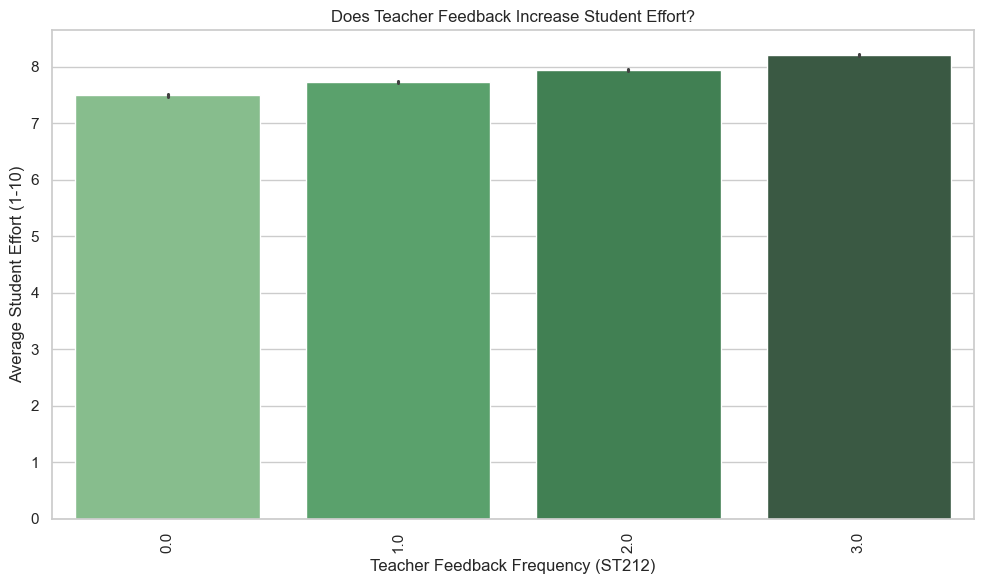

In [56]:
# The Motivation Link (Teacher -> Student Effort)

plt.figure(figsize=(10, 6))
# Does frequent feedback make students try harder?
df_mot = df.dropna(subset=['ST212', 'EFFORT1'])

# Filter Teacher Feedback Frequency to only 0, 1, 2, 3
df_mot = df_mot[df_mot['ST212'].isin([0, 1, 2, 3])]

sns.barplot(x='ST212', y='EFFORT1', data=df_mot, palette='Greens_d')

plt.title('Does Teacher Feedback Increase Student Effort?')
plt.xlabel('Teacher Feedback Frequency (ST212)')
plt.ylabel('Average Student Effort (1-10)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/hv/w6077z5935x8kmy_dbmjv7rw0000gn/T/ipykernel_7690/2919916344.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ST213', y='ST034', data=df_con, palette='Purples_d')


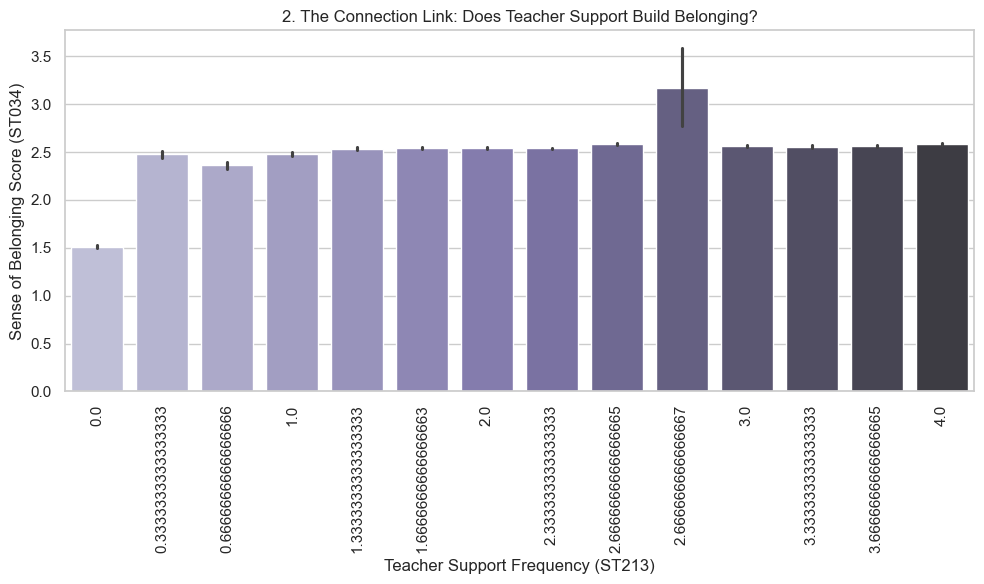

In [57]:
# The Connection Link (Teacher -> Belonging)

plt.figure(figsize=(10, 6))
# Does teacher support build a sense of belonging?
df_con = df.dropna(subset=['ST213', 'ST034'])
sns.barplot(x='ST213', y='ST034', data=df_con, palette='Purples_d')

plt.title('2. The Connection Link: Does Teacher Support Build Belonging?')
plt.xlabel('Teacher Support Frequency (ST213)')
plt.ylabel('Sense of Belonging Score (ST034)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

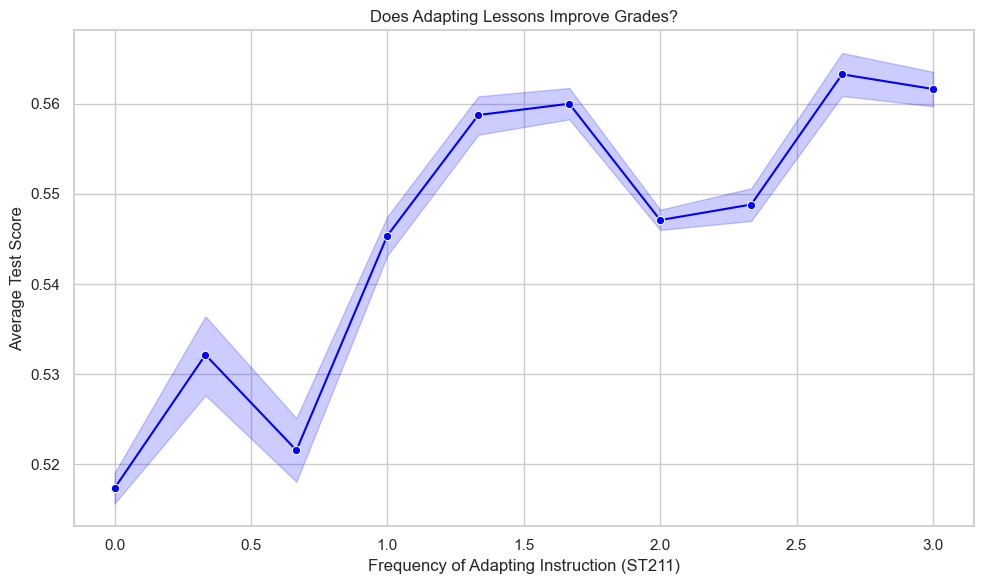

In [58]:
# The Instructional Link (Adaptation -> Grades)

plt.figure(figsize=(10, 6))
# ST211: Teacher adapts instruction (checking understanding)
if 'ST211' in df.columns:
    df_ada = df.dropna(subset=['ST211', 'Avg_Performance'])
    sns.lineplot(x='ST211', y='Avg_Performance', data=df_ada, marker='o', color='blue')
    plt.title('Does Adapting Lessons Improve Grades?')
    plt.xlabel('Frequency of Adapting Instruction (ST211)')
    plt.ylabel('Average Test Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("ST211 (Adaptation) not found in dataset.")